# Week 1

#### Reading the cleaned data from csv and check the data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("cleaned_playstore.csv", index_col="Unnamed: 0")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,1.900000e+07,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,1.400000e+07,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000e+06,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,2.500000e+07,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800000e+06,100000,Free,0.0,Everyone


Assuming the data is cleaned, we won't check anything

### Task 1
#### Print a table of the unique names of all categories

In [3]:
unique_values = data['Category'].unique()
unique_values.sort()
categories = pd.DataFrame({'Category': unique_values})
categories

,Category
0,ART_AND_DESIGN
1,AUTO_AND_VEHICLES
2,BEAUTY
3,BOOKS_AND_REFERENCE
4,BUSINESS
5,COMICS
6,COMMUNICATION
7,DATING
8,EDUCATION
9,ENTERTAINMENT


### Task 2
#### Plot a bar chart for categories with the total number of installing numbers in each category 

In [4]:
installs = data.groupby('Category')['Installs'].sum().reset_index()

In [5]:
categories['Total_Installs'] = installs['Installs']
categories.tail()

,Category,Total_Installs
28,SPORTS,1096474498
29,TOOLS,8001771915
30,TRAVEL_AND_LOCAL,2894887146
31,VIDEO_PLAYERS,3926902720
32,WEATHER,361100520


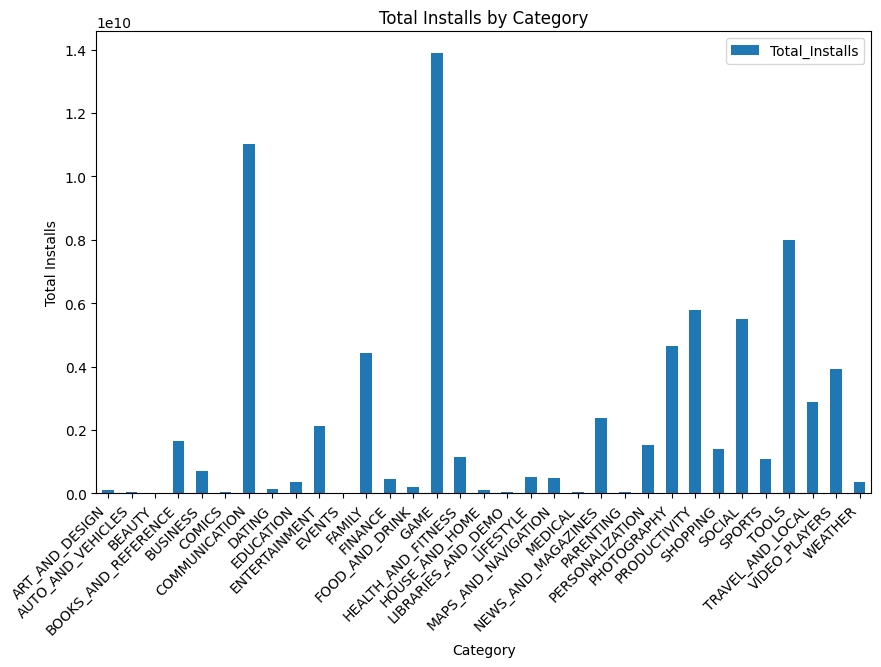

In [6]:
import matplotlib.pyplot as plt

# create a bar chart
ax = categories.plot(kind='bar', figsize=(10, 6))

# set the chart title and axis labels
ax.set_title('Total Installs by Category')
ax.set_xlabel('Category')
ax.set_ylabel('Total Installs')
_ = ax.set_xticklabels(categories.Category, rotation = 45, ha= 'right')

### Task 3
#### Plot a bar chart for the total prices of each paid app in each category ( the summation of all prices in the same category)

In [7]:
prices = data.groupby('Category')['Price'].sum().reset_index()


In [8]:
prices = data.groupby('Category')['Price'].sum().reset_index()
categories['Total_Price'] = prices['Price']
categories.tail()

,Category,Total_Installs,Total_Price
28,SPORTS,1096474498,100.000000
29,TOOLS,8001771915,267.249996
30,TRAVEL_AND_LOCAL,2894887146,49.949999
31,VIDEO_PLAYERS,3926902720,10.460000
32,WEATHER,361100520,32.419999


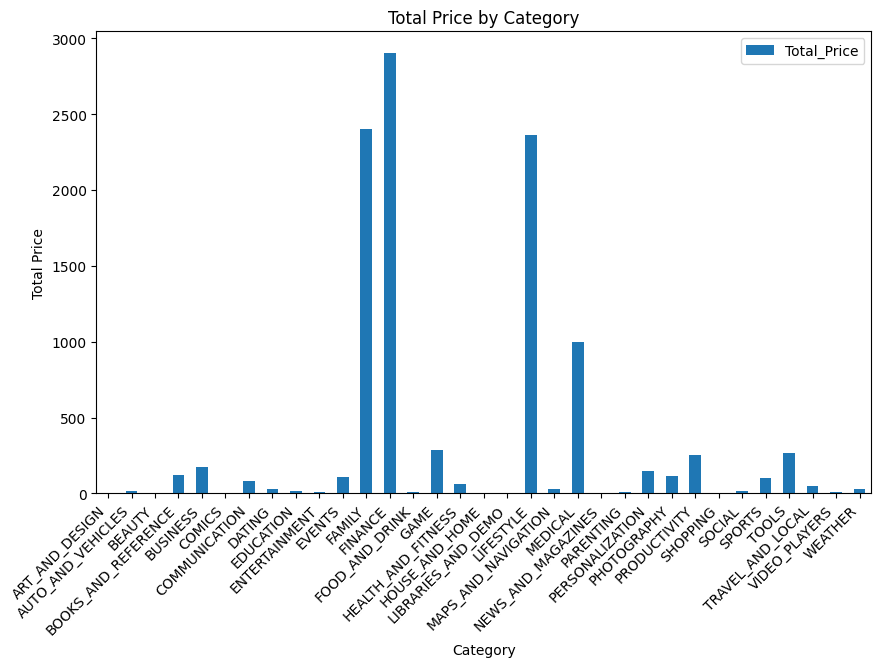

In [9]:
# create a bar chart
ax = categories[['Category', 'Total_Price']].plot(kind='bar', figsize=(10, 6))

# set the chart title and axis labels
ax.set_title('Total Price by Category')
ax.set_xlabel('Category')
ax.set_ylabel('Total Price')
_ = ax.set_xticklabels(categories.Category, rotation = 45, ha= 'right')

### Task 4
#### Plot a bar chart of the total profit of each category by multiplying the price by the number of installs


In [10]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,1.900000e+07,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,1.400000e+07,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000e+06,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,2.500000e+07,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800000e+06,100000,Free,0.0,Everyone


In [16]:
data['Revenue'] = data['Price'] * data['Installs']
data.query('Revenue != 0').head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Revenue
233,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.800000e+06,100000,Paid,4.99,Everyone,498999.977100
234,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,3.900000e+07,100000,Paid,4.99,Everyone,498999.977100
372,Puffin Browser Pro,COMMUNICATION,4.0,18247,2.039287e+07,100000,Paid,3.99,Everyone,399000.001000
406,"Moco+ - Chat, Meet People",DATING,4.2,1545,2.039287e+07,10000,Paid,3.99,Mature 17+,39900.000100
407,Calculator,DATING,2.6,57,6.200000e+06,1000,Paid,6.99,Everyone,6989.999771


In [20]:
revenues = data.groupby('Category')['Revenue'].sum().reset_index()
categories['Total_Revenue'] = revenues['Revenue']
categories

,Category,Total_Installs,Total_Price,Total_Revenue
0,ART_AND_DESIGN,114338100,5.970000,3.184000e+04
1,AUTO_AND_VEHICLES,53130211,13.470000,1.001485e+05
2,BEAUTY,27197050,0.000000,0.000000e+00
3,BOOKS_AND_REFERENCE,1665969576,119.769996,9.022674e+04
4,BUSINESS,697164865,175.289996,1.050543e+06
5,COMICS,44981150,0.000000,0.000000e+00
6,COMMUNICATION,11038276251,83.139999,4.247365e+06
7,DATING,140926107,27.440000,4.846150e+04
8,EDUCATION,352952000,17.960000,2.403980e+06
9,ENTERTAINMENT,2113660000,7.980000,7.980000e+05


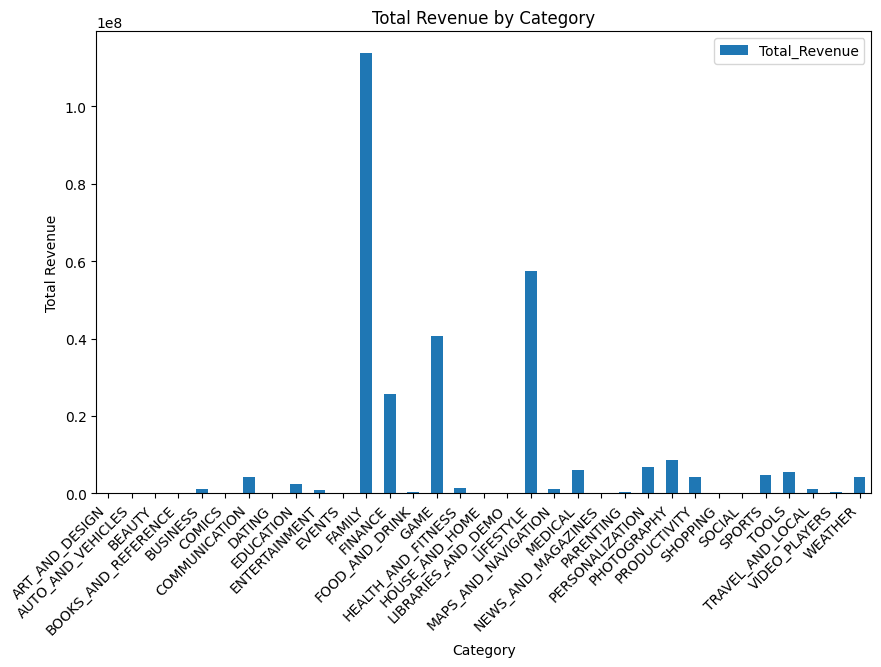

In [19]:
# create a bar chart
ax = categories[['Category', 'Total_Revenue']].plot(kind='bar', figsize=(10, 6))

# set the chart title and axis labels
ax.set_title('Total Revenue by Category')
ax.set_xlabel('Category')
ax.set_ylabel('Total Revenue')
_ = ax.set_xticklabels(categories.Category, rotation = 45, ha= 'right')